<a href="https://colab.research.google.com/github/carlosemiliorabazo/APRENDIZAJE_AUTOMATICO_23_24/blob/main/TEMA%201/3_3_Regresion_Prediccion_Precio_Casas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
keras.__version__

'2.6.0'

# Prediciendo precios de casas: Un ejemplo de regresion
----
La **"regresión"**, consiste en predecir un **valor continuo** de una etiqueta discreta. Por ejemplo, **predecir la temperatura de mañana**, dados los datos meteorológicos, o **predecir el tiempo en que un proyecto de software tardará en completarse**, **dadas sus especificaciones**.

**No confundir "regresión" con el algoritmo "regresión logística": confusamente, "regresión logística" no es un algoritmo de regresión, es un algoritmo de clasificación.**

## El conjunto de datos de Precios de Casas de Boston

Vamos a **predecir** el **precio medio de las viviendas** en un suburbio determinado de **Boston** a mediados de la década de 1970, dados algunos puntos de datos sobre el suburbio en ese momento, como la **tasa de criminalidad**, la **tasa de impuesto a la propiedad local**, etc.

El conjunto de datos que usaremos tiene otra diferencia interesante con nuestros dos ejemplos anteriores: **tiene muy pocos puntos de datos**, solo **506 en total, dividido entre 404 muestras de entrenamiento y 102 muestras de prueba**, y **cada "característica"** en los datos de entrada (por ejemplo, la tasa de criminalidad) es una característica que tiene una **escala diferente**. Por ejemplo, algunos valores son proporciones, que toman valores entre 0 y 1, otros toman valores entre 1 y 12, otros entre 0 y 100 ...

In [ ]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

In [ ]:
train_data.shape

(404, 13)

In [ ]:
test_data.shape

(102, 13)

In [ ]:
train_data[1]

array([2.1770e-02, 8.2500e+01, 2.0300e+00, 0.0000e+00, 4.1500e-01,
       7.6100e+00, 1.5700e+01, 6.2700e+00, 2.0000e+00, 3.4800e+02,
       1.4700e+01, 3.9538e+02, 3.1100e+00])

Tenemos 404 muestras de entrenamiento y 102 muestras de prueba. Los datos comprenden 13 características:
1. **Tasa de delincuencia per cápita.**
2. **Proporción de terreno residencial dividido en zonas para lotes de más de 25k pies cuadrados.**
3. **Proporción de acres comerciales no minoristas por municipio.**
4. **Variable ficticia de Charles River (= 1 si el tramo limita con el río; 0 en caso contrario).**
5. **Concentración de óxidos nítricos (partes por 10 millones).**
6. **Número medio de habitaciones por vivienda.**
7. **Proporción de casas/pisos ocupados por sus propietarios construidas antes de 1940.**
8. **Distancias ponderadas a cinco centros de empleo de Boston.**
9. **Índice de accesibilidad a carreteras radiales.**
10. **Tasa de impuesto a la propiedad de valor total por 10K dólares.**
11. **Proporción alumnos por profesor por municipio.**
12. **1000(Bk - 0,63)^2 donde Bk es la proporción de personas de color por municipio**.
13. **% bajo estatus de la población**

Los **objetivos** son los **valores medios de las viviendas ocupadas por sus propietarios**, en miles de dólares:

In [ ]:
test_targets

array([ 7.2, 18.8, 19. , 27. , 22.2, 24.5, 31.2, 22.9, 20.5, 23.2, 18.6,
       14.5, 17.8, 50. , 20.8, 24.3, 24.2, 19.8, 19.1, 22.7, 12. , 10.2,
       20. , 18.5, 20.9, 23. , 27.5, 30.1,  9.5, 22. , 21.2, 14.1, 33.1,
       23.4, 20.1,  7.4, 15.4, 23.8, 20.1, 24.5, 33. , 28.4, 14.1, 46.7,
       32.5, 29.6, 28.4, 19.8, 20.2, 25. , 35.4, 20.3,  9.7, 14.5, 34.9,
       26.6,  7.2, 50. , 32.4, 21.6, 29.8, 13.1, 27.5, 21.2, 23.1, 21.9,
       13. , 23.2,  8.1,  5.6, 21.7, 29.6, 19.6,  7. , 26.4, 18.9, 20.9,
       28.1, 35.4, 10.2, 24.3, 43.1, 17.6, 15.4, 16.2, 27.1, 21.4, 21.5,
       22.4, 25. , 16.6, 18.6, 22. , 42.8, 35.1, 21.5, 36. , 21.9, 24.1,
       50. , 26.7, 25. ])

Los precios suelen oscilar entre 10K dólares y 50K dólares. Recordar que esto fue a mediados de la década de 1970, y estos precios no se han ajustado por la inflación.

## Preparando los datos

* **Problemático alimentar a una red neuronal con valores que toman rangos tremendamente diferentes** (la red podría adaptarse automáticamente a datos tan heterogéneos, pero dificultaría el aprendizaje)
* Cuando pase esto debemos hacer una **normalización en relación a las características**: para cada característica en los datos de entrada (una columna en la matriz de datos de entrada), **restamos la media de la característica** y la **dividiremos por la desviación estándar**, de modo que **la característica se centrará alrededor de 0** y tendrá una **desviación estándar unitaria**. Esto se hace fácilmente en Numpy:

In [ ]:
print(train_data[1])
mean = train_data.mean(axis=0)
print(mean)
train_data -= mean
std = train_data.std(axis=0)
print(std)

train_data /= std
print(train_data[1])


# OJO LO QUE HACEMOS AHORA, QUE ES MUY IMPORTANTE!!
test_data -= mean
test_data /= std

[2.1770e-02 8.2500e+01 2.0300e+00 0.0000e+00 4.1500e-01 7.6100e+00
 1.5700e+01 6.2700e+00 2.0000e+00 3.4800e+02 1.4700e+01 3.9538e+02
 3.1100e+00]
[3.74511057e+00 1.14801980e+01 1.11044307e+01 6.18811881e-02
 5.57355941e-01 6.26708168e+00 6.90106436e+01 3.74027079e+00
 9.44059406e+00 4.05898515e+02 1.84759901e+01 3.54783168e+02
 1.27408168e+01]
[9.22929073e+00 2.37382770e+01 6.80287253e+00 2.40939633e-01
 1.17147847e-01 7.08908627e-01 2.79060634e+01 2.02770050e+00
 8.68758849e+00 1.66168506e+02 2.19765689e+00 9.39946015e+01
 7.24556085e+00]
[-0.40342651  2.99178419 -1.33391162 -0.25683275 -1.21518188  1.89434613
 -1.91036058  1.24758524 -0.85646254 -0.34843254 -1.71818909  0.43190599
 -1.32920239]


In [ ]:
train_data.shape[1]

13

* **IMPORTANTÍSIMO!!**: Tener en cuenta que las **cantidades** que utilizamos **para normalizar los datos de prueba** se han calculado **utilizando los datos de entrenamiento**.
* **Nunca debemos usar** en nuestro flujo de trabajo cualquier **cantidad calculada en los datos de prueba**, **incluso para** algo tan simple como **la normalización de datos**.

## Construyendo la red

Debido a que hay tan **pocas muestras disponibles**, usaremos una **red muy pequeña** con **dos capas ocultas**, cada una con 64 unidades. En general, **cuantos menos datos de entrenamiento tengamos, peor será el sobreajuste y el uso una red pequeña es una forma de reducir el sobreajuste**.

In [ ]:
import tensorflow as tf
from keras import models
from keras import layers

def build_model():
    # Porque necesitaremos instanciar el mismo modelo
    # múltiples veces, usamos una función para construirlo
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse',
                  metrics=[tf.keras.metrics.MeanAbsoluteError()]) # metrics = ['mae']
    return model

* Nuestra red **termina** con **una sola unidad** y **sin activación** (es decir, **será una capa lineal**).
* **Configuración típica para la regresión escalar** (es decir, regresión en la que intentamos predecir un único valor continuo).
  - La aplicación de una **función de activación** **limitaría el rango que puede tomar la salida**; por ejemplo si aplicamos una función de activación "sigmoide" a nuestra última capa, la red solo aprendería a predecir valores entre 0 y 1.
  - Aquí, porque la última capa es puramente lineal, **la red es libre de aprender a predecir valores en cualquier rango**.
* Compilamos la red con la función de pérdida `mse` (**error cuadrático medio**, el cuadrado de la diferencia entre predicciones y los objetivos, una **función de pérdida ampliamente utilizada para problemas de regresión**)
* Estamos monitorizando una nueva métrica durante el entrenamiento: `mae` **error absoluto medio** (valor absoluto de la diferencia entre las predicciones y los objetivos). **Por ejemplo, un MAE de 0.5 en este problema significaría que nuestras predicciones están equivocadas por 500 dólares en promedio.**

## Validando nuestro enfoque usando la **validación K-fold o K-iteraciones**

* Para evaluar nuestra red mientras seguimos ajustando sus parámetros en pleno entrenamiento(número de épocas o iteraciones), **podríamos dividir** los datos en un conjunto de **entrenamiento** y un conjunto de **validación**.
* Como tenemos tan **pocos datos**, conjunto de validación sería muy pequeño
  - Consecuencia: nuestras **puntuaciones de validación** pueden **cambiar mucho dependiendo de los puntos de datos que elijamos** usar **para la validación** y cuales elijamos **para el  entrenamiento** (las puntuaciones de validación podrían tener **alta varianza** con respecto a la división de validación). Esto impide una evaluación fiable del modelo.
* En estos casos utilizamos la **validación cruzada de K-fold (k-iteraciones)**:
  - Consiste en **dividir los datos disponibles en K particiones** (típicamente **K = 4** o **5**)
  - Luego utilizando **instancias de K modelos idénticos** y entrenando cada uno en K-1 particiones mientras se evalúa la partición restante.
* La puntuación de la validación para el modelo utilizado sería entonces el **promedio de las puntuaciones de las K validaciones obtenidas**.

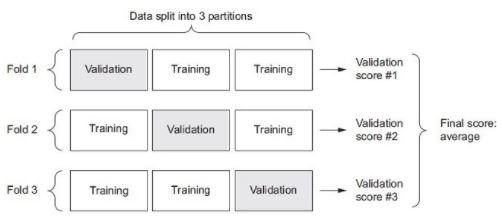

En términos de código, esto es sencillo:

In [ ]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
print("num_val_samples", num_val_samples)
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    # Preparamos la validación de los datos: datos de la partición #k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Preparamos los datos de entrenamiento: Datos de las demás particiones
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Construcción del modelo Keras (ya compilado)
    model = build_model()
    # Entrenando el modelo (en modo silencioso, verbose=0)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    # Evalua el modelo sobre los datos de validación
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

num_val_samples 101
processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [ ]:
all_scores

[1.9239833354949951,
 2.9899420738220215,
 2.5706989765167236,
 2.4880123138427734]

In [ ]:
np.mean(all_scores)

2.4931591749191284

* Se puede ver que **diferentes ejecuciones muestran puntuajes de validación bastante diferentes**, de 1.9 a 2.9
* El **promedio** (2.49) es una **métrica mucho más confiable que cualquier puntuación individual**; esa es la **clave de la validación cruzada de K-iteraciones**.
* En este caso, **nos desviamos una media de 2.500 dólares**, **significativo considerando que los precios oscilan entre 10K dólares (25%) y 50K dólares (5%)**.

Vamos a **entrenar la red un poco más de tiempo**: **500 repeticiones**. Para **mantener un registro de cómo de bien funciona el modelo en cada repetición, modificaremos nuestro ciclo de entrenamiento para guardar el registro de puntuación de validación por repetición**:

In [ ]:
from keras import backend as K

# Some memory clean-up
K.clear_session()

In [ ]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    # Preparamos la validación de los datos: datos de la partición # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Preparamos los datos de entrenamiento: Datos de todas la demás particiones
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Construcción del modelo Keras (ya compilado)
    model = build_model()
    # Entrenando el modelo (en modo silencioso, verbose=0)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


A continuación, podemos calcular el promedio de las puntuaciones MAE por repetición para todas los iteraciones:

In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

Lo pintamos:

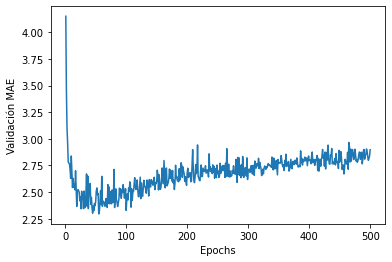

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validación MAE')
plt.show()

Puede ser un poco difícil ver el gráfico debido a **problemas de escala** y la **varianza relativamente alta**. Vamos a:

* **Omitir los primeros 10 puntos de datos**, que están en una **escala diferente del resto de la curva**.
* Reemplazar cada punto con una **media móvil exponencial** de los puntos anteriores para obtener una curva suave.(Una promedio móvil exponencial (EMA) es un cálculo del **valor medio durante un período de tiempo específico** que **da más peso a los datos de valores más recientes**, lo que hace que reaccione más rápidamente a los cambios de valores. Se utilizan en bolsa en los gráficos para ayudar a determinar la **tendencia**, la **dirección** y la **fuerza** de los precios de un valor) (EMA(actual) = ((Precio(actual) – EMA (anterior)) x Multiplicador) + EMA(anterior))

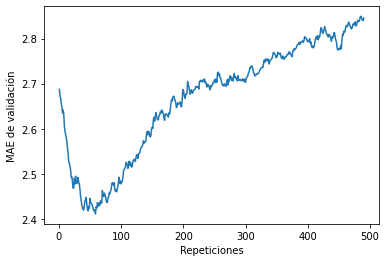

In [ ]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Repeticiones')
plt.ylabel('MAE de validación')
plt.show()

Según este gráfico, parece que el **MAE de validación deja de mejorar significativamente después de 80 repeticiones**. **Pasado ese punto, comenzamos a sobreajustar**.

Una vez que hayamos terminado de ajustar otros parámetros de nuestro modelo (además del número de repeticiones, también podríamos ajustar el tamaño de las capas ocultas), podemos **entrenar un modelo de "producción" final** en todos los datos de entrenamiento, **con los mejores parámetros**, y luego observar su rendimiento en los datos de prueba:

In [ ]:
# Obtenemos un modelo compilado nuevo
model = build_model()
# Lo entrenamos en todos los datos.
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 4ms/step - loss: 15.5914 - mean_absolute_error: 2.5886


In [ ]:
test_mae_score

2.588615655899048

Todavía estamos desviados en alrededor de 2.588 dólares

## Resumiendo

Esto es lo que se debería sacar de este ejemplo:

* La regresión se realiza utilizando funciones de pérdida diferentes a las usadas en la clasificación; El **error cuadrático medio (MSE)** es una **función de pérdida de uso común para regresión**.
* De manera similar, las métricas de evaluación que se utilizarán para la regresión difieren de las utilizadas para la clasificación; naturalmente, el concepto de "precisión" o exactitud no aplica para regresión. **Una métrica de regresión común es el error absoluto medio (MAE)**.
* Cuando las características en los datos de entrada tienen **valores en diferentes rangos**, **cada característica debe escalarse de forma independiente** como paso de preprocesamiento.
* Cuando hay **pocos datos disponibles**, usar la **validación de K-iteraciones** es una excelente manera de evaluar un modelo de manera fiable.
* Cuando hay **pocos datos de entrenamiento** disponibles, es preferible **usar una red pequeña con muy pocas capas ocultas** (generalmente solo una o dos), para **evitar un sobreajuste** exagerado.

---